# EDS6340 - Introduction to Data Science - Project Phase 2

## Group 10
Achanta, Sai Praneeth | 2302324 <br>
Montanez, Derek N | 1920577 <br>
Sai Kiran Anugam | 2312298 <br>
Sandeep Kokkula | 2102358 <br>
Seelam, Gayathri | 2297215 <br>
Venkata Kaushik Belusonti | 2284811

## Presenetion of the best results from Step1, Step2, Step3 and all models from Step 5

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import machine learning models
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
import statsmodels.api as sm
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


### Review the cleaned dataset from Phase 2

In [3]:
# Read the clean dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DS_Project_Group10/Secondary_Mushroom_Dataset/Group_10_Data_Cleaning.csv")
df = df.drop(['Unnamed: 0'], axis = 1)
# Display the first few tuples of the dataset
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,2.340396,6,2,6,0,2,10,2.409448,0.675929,11,1,2,0,3
1,1,2.340396,6,2,6,0,2,10,2.409448,0.812813,11,1,2,0,2
2,1,2.053072,6,2,6,0,2,10,2.409448,0.756815,11,1,2,0,3
3,1,2.079925,2,3,1,0,2,10,2.409448,0.537799,11,1,5,0,3
4,1,2.206132,6,3,6,0,2,10,2.409448,0.689617,11,1,5,0,3


In [4]:
# Display the column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60923 entries, 0 to 60922
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 60923 non-null  int64  
 1   cap-diameter          60923 non-null  float64
 2   cap-shape             60923 non-null  int64  
 3   cap-surface           60923 non-null  int64  
 4   cap-color             60923 non-null  int64  
 5   does-bruise-or-bleed  60923 non-null  int64  
 6   gill-attachment       60923 non-null  int64  
 7   gill-color            60923 non-null  int64  
 8   stem-height           60923 non-null  float64
 9   stem-width            60923 non-null  float64
 10  stem-color            60923 non-null  int64  
 11  has-ring              60923 non-null  int64  
 12  ring-type             60923 non-null  int64  
 13  habitat               60923 non-null  int64  
 14  season                60923 non-null  int64  
dtypes: float64(3), int6

#### Split the features into predicted features and target feature

In [5]:
# Split the features to predicted (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

#### Dataset splitted to Train (80%) and Test (20%)

In [6]:
# Split the dataset into train and test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Read the data from pickles
X_train = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/DS_Project_Group10/ipynb_Files/dummy_Xtrain.pkl")
X_test = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/DS_Project_Group10/ipynb_Files/dummy_Xtest.pkl")
y_train = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/DS_Project_Group10/ipynb_Files/dummy_ytrain.pkl")
y_test = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/DS_Project_Group10/ipynb_Files/dummy_ytest.pkl")
X_train_selected = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/DS_Project_Group10/ipynb_Files/dummy_Xtrain_selected.pkl")
X_test_selected = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/DS_Project_Group10/ipynb_Files/dummy_Xtest_selected.pkl")
X_train_step4 = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/DS_Project_Group10/ipynb_Files/dummy_X_train_step4.pkl")
X_test_step4 = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/DS_Project_Group10/ipynb_Files/dummy_X_test_step4.pkl")

### Define functions to estimate the performance metrics


In [7]:
# Function for perfromance metric of data
def Perf_Metric(Actual_Ouput, Prediction_Output):
  # Actual_Ouput is the actual output of training data taken from the dataset
  # TrainData_Prediction is the predicted output from the model for the training data
  Accuracy = round(accuracy_score(Actual_Ouput, Prediction_Output),3)
  F1Score = round(f1_score(Actual_Ouput, Prediction_Output),3)
  Precision = round(precision_score(Actual_Ouput, Prediction_Output),3)
  Recall = round(recall_score(Actual_Ouput, Prediction_Output),3)
  return [Accuracy, F1Score, Precision, Recall]

# Best Results from Step 1
## Random Forest is found to be the best algorithm

# Random Forest

In [8]:
# Fit the model from training data using Random Forest
model = RandomForestClassifier()
rf = model.fit(X_train, y_train)

In [9]:
# Model fit with training data
y_train_predict = rf.predict(X_train)
# Make predictions on the test data
y_pred = rf.predict(X_test)

In [10]:
# Evaluate performance metric for training and testing data
Train_PM = Perf_Metric(y_train,y_train_predict)
Test_PM = Perf_Metric(y_test,y_pred)

RF_Train_PM = Train_PM
RF_Test_PM = Test_PM

In [11]:
# Create a table comparing the preformance on training and test data
models = pd.DataFrame({
    #'Model': ['RF'],
    'Dataset': ["Train","Test"],
    'Accuracy Score': [Train_PM[0], Test_PM[0]],
    'F1 Score': [Train_PM[1], Test_PM[1]],
    'Precision': [Train_PM[2], Test_PM[2]],
    'Recall': [Train_PM[3], Test_PM[3]],
})
models

,Dataset,Accuracy Score,F1 Score,Precision,Recall
0,Train,1.000,1.000,1.000,1.000
1,Test,0.999,0.999,0.999,0.999


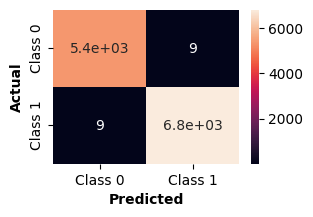

In [12]:
# Plot Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(3, 2))
sns.heatmap(cm,
           annot=True,
           annot_kws={"size":10},
           xticklabels=['Class 0', 'Class 1'],
           yticklabels=['Class 0', 'Class 1'],)
plt.xlabel('Predicted',fontweight='bold')
plt.ylabel('Actual',fontweight='bold');

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.999


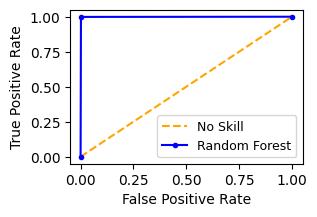

In [13]:
# ROC Curve
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]


# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# plot the roc curve for the model
fig = plt.figure(figsize=(3, 2))
plt.plot(ns_fpr, ns_tpr, linestyle='--', color='orange', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', color='blue', label='Random Forest')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend(fontsize = 9)

# show the plot
plt.show()

# Best Results from Step 3
## Random Forest is found to be the best algorithm with randomized search for hypertuning parameters

In [14]:
# Random Forest before randomized serach
# Fit the model from training data using Random Forest
model = RandomForestClassifier()
rf_bef_random = model.fit(X_train_selected, y_train)

# Model fit with training data
#y_train_predict = rf_bef_random.predict(X_train)
# Make predictions on the test data
rf_y_pred_bef_random = rf_bef_random.predict(X_test_selected)

# Evaluate the model after Randomized Search
accuracy_rf_bef_random = accuracy_score(y_test, rf_y_pred_bef_random)
print(f'Random Forest Accuracy before Randomized Search: {accuracy_rf_bef_random:.4f}')

Random Forest Accuracy before Randomized Search: 0.9793


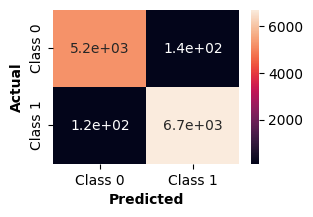

In [15]:
# Plot Confusion matrix
cm = confusion_matrix(y_test, rf_y_pred_bef_random)
fig = plt.figure(figsize=(3, 2))
sns.heatmap(cm,
           annot=True,
           annot_kws={"size":10},
           xticklabels=['Class 0', 'Class 1'],
           yticklabels=['Class 0', 'Class 1'],)
plt.xlabel('Predicted',fontweight='bold')
plt.ylabel('Actual',fontweight='bold');

No Skill: ROC AUC=0.500
Random Forest before randomized search: ROC AUC=0.979


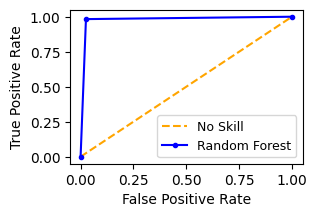

In [16]:
# ROC Curve
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]


# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, rf_y_pred_bef_random)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest before randomized search: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, rf_y_pred_bef_random)

# plot the roc curve for the model
fig = plt.figure(figsize=(3, 2))
plt.plot(ns_fpr, ns_tpr, linestyle='--', color='orange', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', color='blue', label='Random Forest')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend(fontsize = 9)

# show the plot
plt.show()

In [17]:
# Randomized Search for Random Forest
param_dist_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search_rf = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_dist_rf,
                                       n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_rf.fit(X_train_selected, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, scoring='accuracy')

In [18]:
# Get the best hyperparameters for Random Forest
best_params_rf_random = random_search_rf.best_params_

# Fit the model with the best hyperparameters on the entire training set
best_rf_model_random = RandomForestClassifier(**best_params_rf_random)
best_rf_model_random.fit(X_train_selected, y_train)

# Predictions on the test set for Random Forest
rf_y_pred_after_random = best_rf_model_random.predict(X_test_selected)

# Evaluate the model after Randomized Search
accuracy_rf_after_random = accuracy_score(y_test, rf_y_pred_after_random)
print(f'Random Forest Accuracy after Randomized Search: {accuracy_rf_after_random:.4f}')

Random Forest Accuracy after Randomized Search: 0.9809


In [19]:
# Display the best hyper-parameters for random forest
best_params_rf_random

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 30}

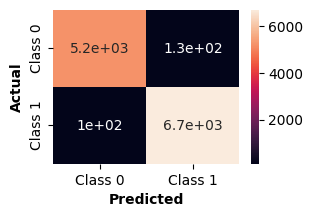

In [20]:
# Plot Confusion matrix
cm = confusion_matrix(y_test, rf_y_pred_after_random)
fig = plt.figure(figsize=(3, 2))
sns.heatmap(cm,
           annot=True,
           annot_kws={"size":10},
           xticklabels=['Class 0', 'Class 1'],
           yticklabels=['Class 0', 'Class 1'],)
plt.xlabel('Predicted',fontweight='bold')
plt.ylabel('Actual',fontweight='bold');

No Skill: ROC AUC=0.500
Random Forest after randomized search: ROC AUC=0.979


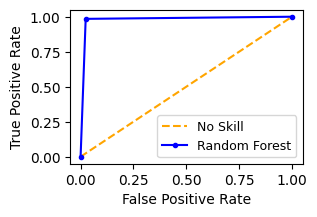

In [21]:
# ROC Curve
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]


# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, rf_y_pred_bef_random)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest after randomized search: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, rf_y_pred_after_random)

# plot the roc curve for the model
fig = plt.figure(figsize=(3, 2))
plt.plot(ns_fpr, ns_tpr, linestyle='--', color='orange', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', color='blue', label='Random Forest')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend(fontsize = 9)

# show the plot
plt.show()

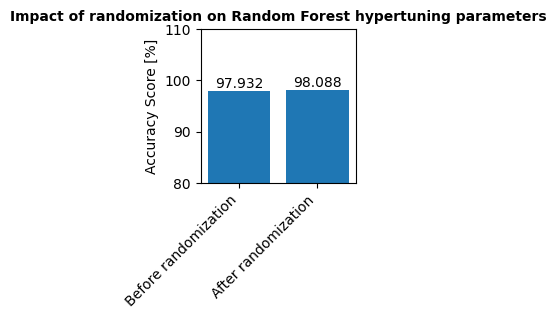

In [22]:
# Impact of randomized search in hypertuning parameters
hyperpar_names = ["Before randomization","After randomization"]
hyperpar_acc = [round(accuracy_rf_bef_random*100,3), round(accuracy_rf_after_random*100,3)]
#aman_uni = pd.DataFrame(review_freq, columns=['Unigram', 'Frequency'])
#aman_uni = aman_uni.set_index('Unigram')

# Plot the bar graph using matplotlib
fig = plt.figure(figsize=(2, 2))
bars = plt.bar(hyperpar_names, hyperpar_acc)
plt.title('Impact of randomization on Random Forest hypertuning parameters', fontsize=10, fontweight='bold')
#plt.xlabel('Kernel')
plt.ylabel('Accuracy Score [%]')
plt.ylim([80, 110])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')
plt.show()

# Best Results from Step 4
## Use the best model from step 1 and step 3 and perform another variable selection using a Bi-directional elimination as a wrapper method

# Random Forest

In [23]:
# Fit the model from training data using Random Forest
model = RandomForestClassifier()
rf = model.fit(X_train_step4, y_train)

In [24]:
# Model fit with training data
y_train_predict = rf.predict(X_train_step4)
# Make predictions on the test data
y_pred = rf.predict(X_test_step4)

In [25]:
# Evaluate performance metric for training and testing data
Train_PM = Perf_Metric(y_train,y_train_predict)
Test_PM = Perf_Metric(y_test,y_pred)

RF_Step5_Train_PM = Train_PM
RF_Step5_Test_PM = Test_PM

In [26]:
# Create a table comparing the preformance on training and test data
models = pd.DataFrame({
    #'Model': ['RF'],
    'Dataset': ["Train","Test"],
    'Accuracy Score': [Train_PM[0], Test_PM[0]],
    'F1 Score': [Train_PM[1], Test_PM[1]],
    'Precision': [Train_PM[2], Test_PM[2]],
    'Recall': [Train_PM[3], Test_PM[3]],
})
models

,Dataset,Accuracy Score,F1 Score,Precision,Recall
0,Train,1.000,1.000,1.000,1.000
1,Test,0.998,0.998,0.998,0.998


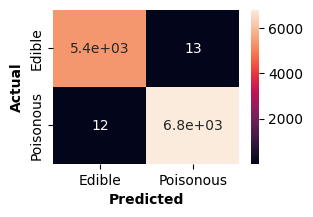

In [27]:
# Plot Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(3, 2))
sns.heatmap(cm,
           annot=True,
           annot_kws={"size":10},
           xticklabels=['Edible', 'Poisonous'],
           yticklabels=['Edible', 'Poisonous'],)
plt.xlabel('Predicted',fontweight='bold')
plt.ylabel('Actual',fontweight='bold');

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.979


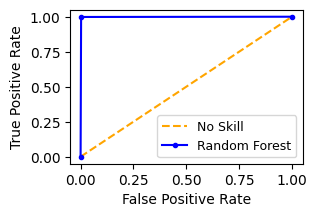

In [28]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# plot the roc curve for the model
fig = plt.figure(figsize=(3, 2))
plt.plot(ns_fpr, ns_tpr, linestyle='--', color='orange', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', color='blue', label='Random Forest')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend(fontsize = 9)

# show the plot
plt.show()

# Random Forest without Bidirectional Feature Elimation

In [29]:
# Fit the model from training data using Random Forest
model = RandomForestClassifier()
rf = model.fit(X_train, y_train)

In [30]:
# Model fit with training data
y_train_predict = rf.predict(X_train)
# Make predictions on the test data
y_pred = rf.predict(X_test)

In [31]:
# Evaluate performance metric for training and testing data
Train_PM = Perf_Metric(y_train,y_train_predict)
Test_PM = Perf_Metric(y_test,y_pred)

RF_Train_PM = Train_PM
RF_Test_PM = Test_PM

In [32]:
# Create a table comparing the preformance on training and test data
models = pd.DataFrame({
    #'Model': ['RF'],
    'Dataset': ["Train","Test"],
    'Accuracy Score': [Train_PM[0], Test_PM[0]],
    'F1 Score': [Train_PM[1], Test_PM[1]],
    'Precision': [Train_PM[2], Test_PM[2]],
    'Recall': [Train_PM[3], Test_PM[3]],
})
models

,Dataset,Accuracy Score,F1 Score,Precision,Recall
0,Train,1.000,1.000,1.000,1.000
1,Test,0.999,0.999,0.999,0.999


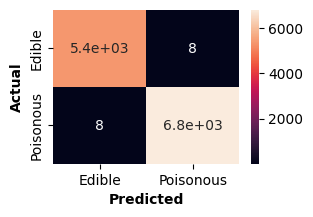

In [33]:
# Plot Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(3, 2))
sns.heatmap(cm,
           annot=True,
           annot_kws={"size":10},
           xticklabels=['Edible', 'Poisonous'],
           yticklabels=['Edible', 'Poisonous'],)
plt.xlabel('Predicted',fontweight='bold')
plt.ylabel('Actual',fontweight='bold');

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.979


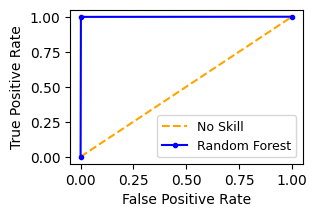

In [34]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# plot the roc curve for the model
fig = plt.figure(figsize=(3, 2))
plt.plot(ns_fpr, ns_tpr, linestyle='--', color='orange', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', color='blue', label='Random Forest')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend(fontsize = 9)

# show the plot
plt.show()

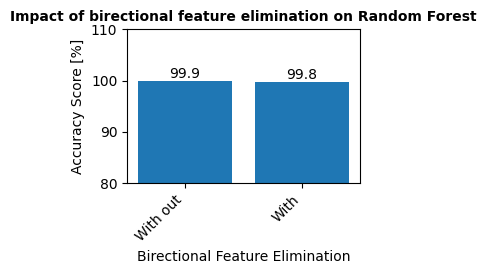

In [35]:
# Impact of Bidirectional elimination on Random Forest
hyperpar_names = ["With out","With"]
hyperpar_acc = [round(RF_Test_PM[0]*100,3), round(RF_Step5_Test_PM[0]*100,3)]
#aman_uni = pd.DataFrame(review_freq, columns=['Unigram', 'Frequency'])
#aman_uni = aman_uni.set_index('Unigram')

# Plot the bar graph using matplotlib
fig = plt.figure(figsize=(3, 2))
bars = plt.bar(hyperpar_names, hyperpar_acc)
plt.title('Impact of birectional feature elimination on Random Forest', fontsize=10, fontweight='bold')
plt.xlabel('Birectional Feature Elimination')
plt.ylabel('Accuracy Score [%]')
plt.ylim([80, 110])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')
plt.show()

# Best results from Step 5

## Step 5: Feature selection step 2 also build (Based on the models compatibility with the data i.e classification or regression problem)

# Performing few more machine learning model training

XG Boost

In [36]:
# Fit the model from taining data using XG Boost
xgb_model = XGBClassifier(n_estimators=1000 ,random_state=42)
xgb = xgb_model.fit(X_train_selected, y_train)

# Model fit with training data
y_train_predict = xgb.predict(X_train_selected)
# Make predictions on the test data
y_pred = xgb.predict(X_test_selected)

# Evaluate performance metrics
Train_PM = Perf_Metric(y_train,y_train_predict)
Test_PM = Perf_Metric(y_test,y_pred)

XGB_Train_PM = Train_PM
XGB_Test_PM = Test_PM

# Create a table comparing the preformance on training and test data
models = pd.DataFrame({
    #'Model': ['Logistic Regression'],
    'Dataset': ["Train","Test"],
    'Accuracy Score': [Train_PM[0], Test_PM[0]],
    'F1 Score': [Train_PM[1], Test_PM[1]],
    'Precision': [Train_PM[2], Test_PM[2]],
    'Recall': [Train_PM[3], Test_PM[3]],
})
models

,Dataset,Accuracy Score,F1 Score,Precision,Recall
0,Train,0.999,0.999,0.999,0.999
1,Test,0.976,0.979,0.979,0.978


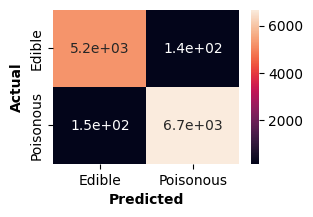

In [37]:
# Plot Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(3, 2))
sns.heatmap(cm,
           annot=True,
           annot_kws={"size":10},
           xticklabels=['Edible', 'Poisonous'],
           yticklabels=['Edible', 'Poisonous'],)
plt.xlabel('Predicted',fontweight='bold')
plt.ylabel('Actual',fontweight='bold');

No Skill: ROC AUC=0.500
XG Boost: ROC AUC=0.979


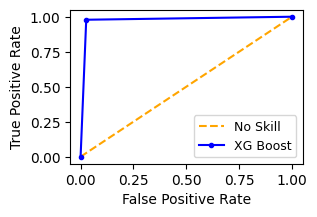

In [38]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XG Boost: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# plot the roc curve for the model
fig = plt.figure(figsize=(3, 2))
plt.plot(ns_fpr, ns_tpr, linestyle='--', color='orange', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', color='blue', label='XG Boost')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend(fontsize = 9)

# show the plot
plt.show()

## Extreme Machine Larning Model

#### Extreme ML Model is a Deep Learning model that consists of two or more hidden layers. The deeper the model (number of layers) the model has, the better the model is at learning the dataset. The model has an input layer that takes in the newly shaped independent variables, and a single output neuron that decides the binary classification.

In [39]:
!pip install scikeras
from tensorflow.keras import models, datasets, layers, optimizers
#from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
from scikeras.wrappers import KerasClassifier

# Function to build ann model
def build_ann():
  # creating the layers of the NN
  ann = models.Sequential()
  ann.add(layers.Input(shape=(len(X_train_selected.columns), )))
  ann.add(layers.Dense(units=56, activation='relu'))
  ann.add(layers.Dense(units=128, activation='relu'))
  ann.add(layers.Dense(units=256, activation='relu'))
  ann.add(layers.Dense(units=128, activation='relu'))
  ann.add(layers.Dense(units=56, activation='relu'))
  ann.add(layers.Dense(units=1, activation='sigmoid'))
  ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return ann

model = KerasClassifier(build_fn=build_ann)
# Set params to test for in GridSeach
params={'batch_size':[200, 250],
        'epochs':[15, 20, 25]
        }

# Instantiate the RandomizedSearchCV object:
random_search_ann = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter = 4)

# Fit trained dataset with the best seeacrh
random_search_ann.fit(X_train_selected, y_train)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
156/156 [==============================] - 3s 8ms/step - loss: 0.5695 - accuracy: 0.6828
Epoch 2/15
156/156 [==============================] - 1s 7ms/step - loss: 0.4037 - accuracy: 0.7984
Epoch 3/15
156/156 [==============================] - 1s 7ms/step - loss: 0.3054 - accuracy: 0.8585
Epoch 4/15
156/156 [==============================] - 1s 7ms/step - loss: 0.2384 - accuracy: 0.8959
Epoch 5/15
156/156 [==============================] - 1s 7ms/step - loss: 0.2190 - accuracy: 0.9035
Epoch 6/15
156/156 [==============================] - 1s 8ms/step - loss: 0.1878 - accuracy: 0.9195
Epoch 7/15
156/156 [==============================] - 2s 12ms/step - loss: 0.1731 - accuracy: 0.9279
Epoch 8/15
156/156 [==============================] - 2s 12ms/step - loss: 0.1534 - accuracy: 0.9382
Epoch 9/15
156/156 [==============================] - 2s 12ms/step - loss: 0.1481 - accuracy: 0.9393
Epoch 10/15
156/156 [==============================] - 2s 12ms/step - loss: 0.1368 - accuracy: 0.

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


156/156 [==============================] - 2s 7ms/step - loss: 0.5583 - accuracy: 0.6929
Epoch 2/15
156/156 [==============================] - 1s 7ms/step - loss: 0.3813 - accuracy: 0.8112
Epoch 3/15
156/156 [==============================] - 2s 11ms/step - loss: 0.2761 - accuracy: 0.8739
Epoch 4/15
156/156 [==============================] - 2s 11ms/step - loss: 0.2320 - accuracy: 0.8990
Epoch 5/15
156/156 [==============================] - 2s 12ms/step - loss: 0.2059 - accuracy: 0.9118
Epoch 6/15
156/156 [==============================] - 2s 11ms/step - loss: 0.1722 - accuracy: 0.9291
Epoch 7/15
156/156 [==============================] - 1s 9ms/step - loss: 0.1582 - accuracy: 0.9362
Epoch 8/15
156/156 [==============================] - 1s 8ms/step - loss: 0.1502 - accuracy: 0.9395
Epoch 9/15
156/156 [==============================] - 1s 8ms/step - loss: 0.1279 - accuracy: 0.9505
Epoch 10/15
156/156 [==============================] - 1s 7ms/step - loss: 0.1260 - accuracy: 0.9506
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
156/156 [==============================] - 4s 12ms/step - loss: 0.5641 - accuracy: 0.6857
Epoch 2/15
156/156 [==============================] - 2s 12ms/step - loss: 0.3934 - accuracy: 0.8014
Epoch 3/15
156/156 [==============================] - 1s 9ms/step - loss: 0.3016 - accuracy: 0.8575
Epoch 4/15
156/156 [==============================] - 1s 8ms/step - loss: 0.2407 - accuracy: 0.8928
Epoch 5/15
156/156 [==============================] - 1s 7ms/step - loss: 0.2125 - accuracy: 0.9055
Epoch 6/15
156/156 [==============================] - 1s 7ms/step - loss: 0.1871 - accuracy: 0.9198
Epoch 7/15
156/156 [==============================] - 1s 7ms/step - loss: 0.1705 - accuracy: 0.9276
Epoch 8/15
156/156 [==============================] - 1s 8ms/step - loss: 0.1532 - accuracy: 0.9371
Epoch 9/15
156/156 [==============================] - 1s 8ms/step - loss: 0.1496 - accuracy: 0.9394
Epoch 10/15
156/156 [==============================] - 1s 8ms/step - loss: 0.1338 - accuracy: 0.94

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


156/156 [==============================] - 2s 7ms/step - loss: 0.5554 - accuracy: 0.6949
Epoch 2/15
156/156 [==============================] - 1s 7ms/step - loss: 0.3992 - accuracy: 0.8020
Epoch 3/15
156/156 [==============================] - 1s 7ms/step - loss: 0.2990 - accuracy: 0.8625
Epoch 4/15
156/156 [==============================] - 1s 7ms/step - loss: 0.2591 - accuracy: 0.8825
Epoch 5/15
156/156 [==============================] - 1s 8ms/step - loss: 0.2128 - accuracy: 0.9079
Epoch 6/15
156/156 [==============================] - 1s 7ms/step - loss: 0.1925 - accuracy: 0.9193
Epoch 7/15
156/156 [==============================] - 1s 7ms/step - loss: 0.1761 - accuracy: 0.9283
Epoch 8/15
156/156 [==============================] - 2s 12ms/step - loss: 0.1568 - accuracy: 0.9369
Epoch 9/15
156/156 [==============================] - 2s 11ms/step - loss: 0.1532 - accuracy: 0.9402
Epoch 10/15
156/156 [==============================] - 2s 11ms/step - loss: 0.1347 - accuracy: 0.9467
Epoch 1

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


156/156 [==============================] - 2s 7ms/step - loss: 0.5708 - accuracy: 0.6830
Epoch 2/15
156/156 [==============================] - 1s 7ms/step - loss: 0.3925 - accuracy: 0.8045
Epoch 3/15
156/156 [==============================] - 1s 7ms/step - loss: 0.3005 - accuracy: 0.8599
Epoch 4/15
156/156 [==============================] - 2s 10ms/step - loss: 0.2386 - accuracy: 0.8957
Epoch 5/15
156/156 [==============================] - 2s 12ms/step - loss: 0.2027 - accuracy: 0.9130
Epoch 6/15
156/156 [==============================] - 2s 12ms/step - loss: 0.1773 - accuracy: 0.9263
Epoch 7/15
156/156 [==============================] - 2s 12ms/step - loss: 0.1718 - accuracy: 0.9300
Epoch 8/15
156/156 [==============================] - 2s 10ms/step - loss: 0.1493 - accuracy: 0.9394
Epoch 9/15
156/156 [==============================] - 1s 9ms/step - loss: 0.1421 - accuracy: 0.9426
Epoch 10/15
156/156 [==============================] - 2s 13ms/step - loss: 0.1254 - accuracy: 0.9503
Epoc

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
195/195 [==============================] - 4s 10ms/step - loss: 0.5486 - accuracy: 0.6947
Epoch 2/15
195/195 [==============================] - 2s 9ms/step - loss: 0.3671 - accuracy: 0.8225
Epoch 3/15
195/195 [==============================] - 1s 7ms/step - loss: 0.2857 - accuracy: 0.8691
Epoch 4/15
195/195 [==============================] - 1s 7ms/step - loss: 0.2360 - accuracy: 0.8961
Epoch 5/15
195/195 [==============================] - 1s 7ms/step - loss: 0.2075 - accuracy: 0.9119
Epoch 6/15
195/195 [==============================] - 1s 7ms/step - loss: 0.1781 - accuracy: 0.9262
Epoch 7/15
195/195 [==============================] - 1s 7ms/step - loss: 0.1578 - accuracy: 0.9374
Epoch 8/15
195/195 [==============================] - 1s 7ms/step - loss: 0.1450 - accuracy: 0.9431
Epoch 9/15
195/195 [==============================] - 1s 7ms/step - loss: 0.1383 - accuracy: 0.9458
Epoch 10/15
195/195 [==============================] - 2s 11ms/step - loss: 0.1228 - accuracy: 0.95

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
195/195 [==============================] - 3s 7ms/step - loss: 0.5712 - accuracy: 0.6857
Epoch 2/15
195/195 [==============================] - 1s 7ms/step - loss: 0.4043 - accuracy: 0.7995
Epoch 3/15
195/195 [==============================] - 1s 7ms/step - loss: 0.2924 - accuracy: 0.8635
Epoch 4/15
195/195 [==============================] - 2s 9ms/step - loss: 0.2405 - accuracy: 0.8930
Epoch 5/15
195/195 [==============================] - 2s 11ms/step - loss: 0.2173 - accuracy: 0.9035
Epoch 6/15
195/195 [==============================] - 2s 11ms/step - loss: 0.1863 - accuracy: 0.9221
Epoch 7/15
195/195 [==============================] - 2s 11ms/step - loss: 0.1683 - accuracy: 0.9302
Epoch 8/15
195/195 [==============================] - 1s 7ms/step - loss: 0.1511 - accuracy: 0.9389
Epoch 9/15
195/195 [==============================] - 1s 7ms/step - loss: 0.1427 - accuracy: 0.9420
Epoch 10/15
195/195 [==============================] - 1s 7ms/step - loss: 0.1305 - accuracy: 0.9

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/15
195/195 [==============================] - 4s 11ms/step - loss: 0.5662 - accuracy: 0.6857
Epoch 2/15
195/195 [==============================] - 2s 9ms/step - loss: 0.4129 - accuracy: 0.7913
Epoch 3/15
195/195 [==============================] - 1s 7ms/step - loss: 0.3247 - accuracy: 0.8422
Epoch 4/15
195/195 [==============================] - 1s 7ms/step - loss: 0.2635 - accuracy: 0.8801
Epoch 5/15
195/195 [==============================] - 1s 7ms/step - loss: 0.2256 - accuracy: 0.9031
Epoch 6/15
195/195 [==============================] - 1s 7ms/step - loss: 0.1972 - accuracy: 0.9179
Epoch 7/15
195/195 [==============================] - 1s 7ms/step - loss: 0.1740 - accuracy: 0.9287
Epoch 8/15
195/195 [==============================] - 1s 7ms/step - loss: 0.1551 - accuracy: 0.9383
Epoch 9/15
195/195 [==============================] - 1s 7ms/step - loss: 0.1503 - accuracy: 0.9401
Epoch 10/15
195/195 [==============================] - 2s 10ms/step - loss: 0.1367 - accuracy: 0.94

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


195/195 [==============================] - 3s 7ms/step - loss: 0.5665 - accuracy: 0.6832
Epoch 2/15
195/195 [==============================] - 2s 8ms/step - loss: 0.3925 - accuracy: 0.8072
Epoch 3/15
195/195 [==============================] - 2s 10ms/step - loss: 0.2947 - accuracy: 0.8656
Epoch 4/15
195/195 [==============================] - 2s 10ms/step - loss: 0.2342 - accuracy: 0.8971
Epoch 5/15
195/195 [==============================] - 2s 10ms/step - loss: 0.1959 - accuracy: 0.9166
Epoch 6/15
195/195 [==============================] - 2s 8ms/step - loss: 0.1733 - accuracy: 0.9290
Epoch 7/15
195/195 [==============================] - 1s 7ms/step - loss: 0.1586 - accuracy: 0.9336
Epoch 8/15
195/195 [==============================] - 1s 7ms/step - loss: 0.1462 - accuracy: 0.9415
Epoch 9/15
195/195 [==============================] - 1s 7ms/step - loss: 0.1286 - accuracy: 0.9493
Epoch 10/15
195/195 [==============================] - 1s 7ms/step - loss: 0.1240 - accuracy: 0.9507
Epoch 1

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


195/195 [==============================] - 3s 7ms/step - loss: 0.5871 - accuracy: 0.6690
Epoch 2/15
195/195 [==============================] - 1s 7ms/step - loss: 0.4377 - accuracy: 0.7763
Epoch 3/15
195/195 [==============================] - 1s 7ms/step - loss: 0.3287 - accuracy: 0.8433
Epoch 4/15
195/195 [==============================] - 1s 7ms/step - loss: 0.2658 - accuracy: 0.8792
Epoch 5/15
195/195 [==============================] - 1s 7ms/step - loss: 0.2381 - accuracy: 0.8939
Epoch 6/15
195/195 [==============================] - 2s 8ms/step - loss: 0.2092 - accuracy: 0.9087
Epoch 7/15
195/195 [==============================] - 2s 10ms/step - loss: 0.1903 - accuracy: 0.9190
Epoch 8/15
195/195 [==============================] - 2s 11ms/step - loss: 0.1676 - accuracy: 0.9315
Epoch 9/15
195/195 [==============================] - 2s 10ms/step - loss: 0.1642 - accuracy: 0.9334
Epoch 10/15
195/195 [==============================] - 2s 9ms/step - loss: 0.1513 - accuracy: 0.9382
Epoch 1

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


195/195 [==============================] - 3s 9ms/step - loss: 0.5612 - accuracy: 0.6911
Epoch 2/20
195/195 [==============================] - 2s 11ms/step - loss: 0.3854 - accuracy: 0.8097
Epoch 3/20
195/195 [==============================] - 2s 10ms/step - loss: 0.2838 - accuracy: 0.8706
Epoch 4/20
195/195 [==============================] - 2s 10ms/step - loss: 0.2304 - accuracy: 0.8998
Epoch 5/20
195/195 [==============================] - 2s 8ms/step - loss: 0.2000 - accuracy: 0.9148
Epoch 6/20
195/195 [==============================] - 1s 7ms/step - loss: 0.1767 - accuracy: 0.9265
Epoch 7/20
195/195 [==============================] - 1s 7ms/step - loss: 0.1507 - accuracy: 0.9385
Epoch 8/20
195/195 [==============================] - 1s 7ms/step - loss: 0.1436 - accuracy: 0.9423
Epoch 9/20
195/195 [==============================] - 1s 7ms/step - loss: 0.1327 - accuracy: 0.9468
Epoch 10/20
195/195 [==============================] - 1s 7ms/step - loss: 0.1253 - accuracy: 0.9494
Epoch 1

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


195/195 [==============================] - 3s 7ms/step - loss: 0.5406 - accuracy: 0.7043
Epoch 2/20
195/195 [==============================] - 1s 7ms/step - loss: 0.3606 - accuracy: 0.8247
Epoch 3/20
195/195 [==============================] - 1s 7ms/step - loss: 0.2740 - accuracy: 0.8750
Epoch 4/20
195/195 [==============================] - 1s 7ms/step - loss: 0.2261 - accuracy: 0.8997
Epoch 5/20
195/195 [==============================] - 1s 7ms/step - loss: 0.1948 - accuracy: 0.9178
Epoch 6/20
195/195 [==============================] - 2s 9ms/step - loss: 0.1698 - accuracy: 0.9297
Epoch 7/20
195/195 [==============================] - 2s 11ms/step - loss: 0.1600 - accuracy: 0.9339
Epoch 8/20
195/195 [==============================] - 2s 11ms/step - loss: 0.1465 - accuracy: 0.9404
Epoch 9/20
195/195 [==============================] - 2s 11ms/step - loss: 0.1351 - accuracy: 0.9458
Epoch 10/20
195/195 [==============================] - 1s 7ms/step - loss: 0.1312 - accuracy: 0.9471
Epoch 1

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


195/195 [==============================] - 3s 10ms/step - loss: 0.5443 - accuracy: 0.7066
Epoch 2/20
195/195 [==============================] - 2s 11ms/step - loss: 0.3831 - accuracy: 0.8150
Epoch 3/20
195/195 [==============================] - 2s 11ms/step - loss: 0.2799 - accuracy: 0.8737
Epoch 4/20
195/195 [==============================] - 2s 10ms/step - loss: 0.2300 - accuracy: 0.8998
Epoch 5/20
195/195 [==============================] - 1s 7ms/step - loss: 0.2014 - accuracy: 0.9148
Epoch 6/20
195/195 [==============================] - 1s 7ms/step - loss: 0.1709 - accuracy: 0.9298
Epoch 7/20
195/195 [==============================] - 1s 7ms/step - loss: 0.1561 - accuracy: 0.9368
Epoch 8/20
195/195 [==============================] - 1s 7ms/step - loss: 0.1501 - accuracy: 0.9424
Epoch 9/20
195/195 [==============================] - 1s 7ms/step - loss: 0.1346 - accuracy: 0.9488
Epoch 10/20
195/195 [==============================] - 1s 7ms/step - loss: 0.1224 - accuracy: 0.9533
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


195/195 [==============================] - 3s 7ms/step - loss: 0.5362 - accuracy: 0.7105
Epoch 2/20
195/195 [==============================] - 1s 7ms/step - loss: 0.3512 - accuracy: 0.8293
Epoch 3/20
195/195 [==============================] - 1s 7ms/step - loss: 0.2643 - accuracy: 0.8804
Epoch 4/20
195/195 [==============================] - 1s 7ms/step - loss: 0.2230 - accuracy: 0.9032
Epoch 5/20
195/195 [==============================] - 1s 7ms/step - loss: 0.1863 - accuracy: 0.9217
Epoch 6/20
195/195 [==============================] - 2s 10ms/step - loss: 0.1687 - accuracy: 0.9317
Epoch 7/20
195/195 [==============================] - 2s 11ms/step - loss: 0.1539 - accuracy: 0.9375
Epoch 8/20
195/195 [==============================] - 2s 11ms/step - loss: 0.1499 - accuracy: 0.9378
Epoch 9/20
195/195 [==============================] - 2s 10ms/step - loss: 0.1308 - accuracy: 0.9490
Epoch 10/20
195/195 [==============================] - 1s 7ms/step - loss: 0.1203 - accuracy: 0.9531
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


195/195 [==============================] - 3s 7ms/step - loss: 0.5664 - accuracy: 0.6880
Epoch 2/20
195/195 [==============================] - 1s 7ms/step - loss: 0.3993 - accuracy: 0.8016
Epoch 3/20
195/195 [==============================] - 1s 7ms/step - loss: 0.2983 - accuracy: 0.8611
Epoch 4/20
195/195 [==============================] - 1s 7ms/step - loss: 0.2438 - accuracy: 0.8911
Epoch 5/20
195/195 [==============================] - 1s 7ms/step - loss: 0.2152 - accuracy: 0.9070
Epoch 6/20
195/195 [==============================] - 2s 8ms/step - loss: 0.1924 - accuracy: 0.9184
Epoch 7/20
195/195 [==============================] - 2s 11ms/step - loss: 0.1734 - accuracy: 0.9294
Epoch 8/20
195/195 [==============================] - 2s 11ms/step - loss: 0.1602 - accuracy: 0.9354
Epoch 9/20
195/195 [==============================] - 2s 11ms/step - loss: 0.1511 - accuracy: 0.9391
Epoch 10/20
195/195 [==============================] - 2s 8ms/step - loss: 0.1400 - accuracy: 0.9446
Epoch 1

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


195/195 [==============================] - 3s 7ms/step - loss: 0.5555 - accuracy: 0.6938
Epoch 2/25
195/195 [==============================] - 1s 7ms/step - loss: 0.3807 - accuracy: 0.8147
Epoch 3/25
195/195 [==============================] - 1s 7ms/step - loss: 0.2709 - accuracy: 0.8788
Epoch 4/25
195/195 [==============================] - 1s 7ms/step - loss: 0.2429 - accuracy: 0.8915
Epoch 5/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1973 - accuracy: 0.9170
Epoch 6/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1784 - accuracy: 0.9246
Epoch 7/25
195/195 [==============================] - 2s 11ms/step - loss: 0.1656 - accuracy: 0.9324
Epoch 8/25
195/195 [==============================] - 2s 11ms/step - loss: 0.1460 - accuracy: 0.9411
Epoch 9/25
195/195 [==============================] - 2s 10ms/step - loss: 0.1420 - accuracy: 0.9424
Epoch 10/25
195/195 [==============================] - 2s 10ms/step - loss: 0.1323 - accuracy: 0.9469
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


195/195 [==============================] - 3s 7ms/step - loss: 0.5653 - accuracy: 0.6902
Epoch 2/25
195/195 [==============================] - 2s 9ms/step - loss: 0.4005 - accuracy: 0.8030
Epoch 3/25
195/195 [==============================] - 2s 11ms/step - loss: 0.3088 - accuracy: 0.8542
Epoch 4/25
195/195 [==============================] - 2s 11ms/step - loss: 0.2569 - accuracy: 0.8836
Epoch 5/25
195/195 [==============================] - 2s 11ms/step - loss: 0.2140 - accuracy: 0.9065
Epoch 6/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1987 - accuracy: 0.9154
Epoch 7/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1798 - accuracy: 0.9252
Epoch 8/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1642 - accuracy: 0.9337
Epoch 9/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1544 - accuracy: 0.9379
Epoch 10/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1400 - accuracy: 0.9437
Epoch 1

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/25
195/195 [==============================] - 4s 8ms/step - loss: 0.5876 - accuracy: 0.6617
Epoch 2/25
195/195 [==============================] - 1s 7ms/step - loss: 0.4187 - accuracy: 0.7879
Epoch 3/25
195/195 [==============================] - 1s 7ms/step - loss: 0.3071 - accuracy: 0.8538
Epoch 4/25
195/195 [==============================] - 1s 7ms/step - loss: 0.2435 - accuracy: 0.8882
Epoch 5/25
195/195 [==============================] - 1s 7ms/step - loss: 0.2120 - accuracy: 0.9076
Epoch 6/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1885 - accuracy: 0.9200
Epoch 7/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1704 - accuracy: 0.9293
Epoch 8/25
195/195 [==============================] - 2s 10ms/step - loss: 0.1504 - accuracy: 0.9382
Epoch 9/25
195/195 [==============================] - 2s 11ms/step - loss: 0.1427 - accuracy: 0.9423
Epoch 10/25
195/195 [==============================] - 2s 11ms/step - loss: 0.1287 - accuracy: 0.9

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


195/195 [==============================] - 3s 7ms/step - loss: 0.5824 - accuracy: 0.6724
Epoch 2/25
195/195 [==============================] - 1s 7ms/step - loss: 0.4212 - accuracy: 0.7916
Epoch 3/25
195/195 [==============================] - 2s 10ms/step - loss: 0.3096 - accuracy: 0.8584
Epoch 4/25
195/195 [==============================] - 2s 11ms/step - loss: 0.2478 - accuracy: 0.8911
Epoch 5/25
195/195 [==============================] - 2s 11ms/step - loss: 0.2087 - accuracy: 0.9096
Epoch 6/25
195/195 [==============================] - 2s 10ms/step - loss: 0.1844 - accuracy: 0.9220
Epoch 7/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1602 - accuracy: 0.9328
Epoch 8/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1463 - accuracy: 0.9408
Epoch 9/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1373 - accuracy: 0.9452
Epoch 10/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1257 - accuracy: 0.9488
Epoch 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/25
195/195 [==============================] - 4s 11ms/step - loss: 0.5566 - accuracy: 0.6964
Epoch 2/25
195/195 [==============================] - 2s 11ms/step - loss: 0.3775 - accuracy: 0.8175
Epoch 3/25
195/195 [==============================] - 2s 8ms/step - loss: 0.2741 - accuracy: 0.8777
Epoch 4/25
195/195 [==============================] - 1s 7ms/step - loss: 0.2305 - accuracy: 0.8981
Epoch 5/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1951 - accuracy: 0.9178
Epoch 6/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1746 - accuracy: 0.9286
Epoch 7/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1582 - accuracy: 0.9361
Epoch 8/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1416 - accuracy: 0.9446
Epoch 9/25
195/195 [==============================] - 1s 7ms/step - loss: 0.1294 - accuracy: 0.9500
Epoch 10/25
195/195 [==============================] - 2s 9ms/step - loss: 0.1234 - accuracy: 0.95

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


244/244 [==============================] - 3s 7ms/step - loss: 0.5142 - accuracy: 0.7244
Epoch 2/25
244/244 [==============================] - 2s 7ms/step - loss: 0.3181 - accuracy: 0.8484
Epoch 3/25
244/244 [==============================] - 2s 7ms/step - loss: 0.2428 - accuracy: 0.8939
Epoch 4/25
244/244 [==============================] - 2s 8ms/step - loss: 0.2074 - accuracy: 0.9106
Epoch 5/25
244/244 [==============================] - 3s 10ms/step - loss: 0.1792 - accuracy: 0.9251
Epoch 6/25
244/244 [==============================] - 3s 11ms/step - loss: 0.1547 - accuracy: 0.9394
Epoch 7/25
244/244 [==============================] - 2s 10ms/step - loss: 0.1417 - accuracy: 0.9438
Epoch 8/25
244/244 [==============================] - 2s 7ms/step - loss: 0.1321 - accuracy: 0.9487
Epoch 9/25
244/244 [==============================] - 2s 7ms/step - loss: 0.1195 - accuracy: 0.9528
Epoch 10/25
244/244 [==============================] - 2s 7ms/step - loss: 0.1109 - accuracy: 0.9570
Epoch 1

RandomizedSearchCV(estimator=KerasClassifier(build_fn=<function build_ann at 0x7f5a7e7cd090>),
                   n_iter=4,
                   param_distributions={'batch_size': [200, 250],
                                        'epochs': [15, 20, 25]})

In [40]:
# Get the best ANN parameters
params = random_search_ann.best_params_
params

{'epochs': 25, 'batch_size': 200}

In [41]:
# Best ANN estimator
estimator = random_search_ann.best_estimator_
estimator

KerasClassifier(
	model=None
	build_fn=<function build_ann at 0x7f5a7e7cd090>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=200
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=25
	class_weight=None
)

In [42]:
# Train the best ANN model with train data
estimator.fit(X_train_selected, y_train)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


244/244 [==============================] - 3s 8ms/step - loss: 0.5307 - accuracy: 0.7144
Epoch 2/25
244/244 [==============================] - 3s 11ms/step - loss: 0.3408 - accuracy: 0.8362
Epoch 3/25
244/244 [==============================] - 3s 13ms/step - loss: 0.2662 - accuracy: 0.8778
Epoch 4/25
244/244 [==============================] - 4s 16ms/step - loss: 0.2191 - accuracy: 0.9036
Epoch 5/25
244/244 [==============================] - 4s 16ms/step - loss: 0.1910 - accuracy: 0.9194
Epoch 6/25
244/244 [==============================] - 3s 11ms/step - loss: 0.1691 - accuracy: 0.9302
Epoch 7/25
244/244 [==============================] - 3s 11ms/step - loss: 0.1442 - accuracy: 0.9424
Epoch 8/25
244/244 [==============================] - 3s 11ms/step - loss: 0.1396 - accuracy: 0.9442
Epoch 9/25
244/244 [==============================] - 4s 14ms/step - loss: 0.1235 - accuracy: 0.9517
Epoch 10/25
244/244 [==============================] - 4s 18ms/step - loss: 0.1147 - accuracy: 0.9543
E

KerasClassifier(
	model=None
	build_fn=<function build_ann at 0x7f5a7e7cd090>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=200
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=25
	class_weight=None
)

In [43]:
# Prediction with test data
predictions = estimator.predict(X_test_selected)

61/61 [==============================] - 0s 5ms/step


In [44]:
accuracy_EML_best = accuracy_score(y_test, predictions)*100
print(f'Extreme ML Model Accuracy with Hyperparameters {random_search_ann.best_params_} : {round(accuracy_EML_best,3)}')

Extreme ML Model Accuracy with Hyperparameters {'epochs': 25, 'batch_size': 200} : 97.325


No Skill: ROC AUC=0.500
Extreme ML: ROC AUC=0.979


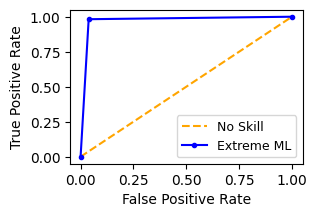

In [45]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Extreme ML: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, predictions)

# plot the roc curve for the model
fig = plt.figure(figsize=(3, 2))
plt.plot(ns_fpr, ns_tpr, linestyle='--', color='orange', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', color='blue', label='Extreme ML')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend(fontsize = 9)

# show the plot
plt.show()

## Deep Learning Model with two hidden layers - Each hidden layer with 100 neurons

In [46]:
# Define neural network with two hidden layers
model = MLPClassifier(hidden_layer_sizes=(100,100))
nn = model.fit(X_train_selected, y_train)



In [47]:
# Model fit with training data
y_train_predict = nn.predict(X_train_selected)
# Make predictions on the test data
y_pred = nn.predict(X_test_selected)

# Evaluate performance metric for training and testing data
Train_PM = Perf_Metric(y_train,y_train_predict)
Test_PM = Perf_Metric(y_test,y_pred)

NN_Train_PM = Train_PM
NN_Test_PM = Test_PM

In [48]:
# Create a table comparing the preformance on training and test data
models = pd.DataFrame({
    #'Model': ['RF'],
    'Dataset': ["Train","Test"],
    'Accuracy Score': [Train_PM[0], Test_PM[0]],
    'F1 Score': [Train_PM[1], Test_PM[1]],
    'Precision': [Train_PM[2], Test_PM[2]],
    'Recall': [Train_PM[3], Test_PM[3]],
})
models

,Dataset,Accuracy Score,F1 Score,Precision,Recall
0,Train,0.967,0.971,0.948,0.994
1,Test,0.962,0.967,0.942,0.993


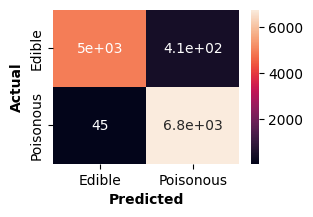

In [49]:
# Plot Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(3, 2))
sns.heatmap(cm,
           annot=True,
           annot_kws={"size":10},
           xticklabels=['Edible', 'Poisonous'],
           yticklabels=['Edible', 'Poisonous'],)
plt.xlabel('Predicted',fontweight='bold')
plt.ylabel('Actual',fontweight='bold');

No Skill: ROC AUC=0.500
DL Neural Network: ROC AUC=0.979


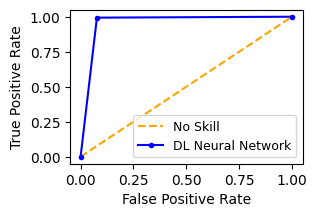

In [50]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('DL Neural Network: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# plot the roc curve for the model
fig = plt.figure(figsize=(3, 2))
plt.plot(ns_fpr, ns_tpr, linestyle='--', color='orange', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', color='blue', label='DL Neural Network')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend(fontsize = 9)

# show the plot
plt.show()

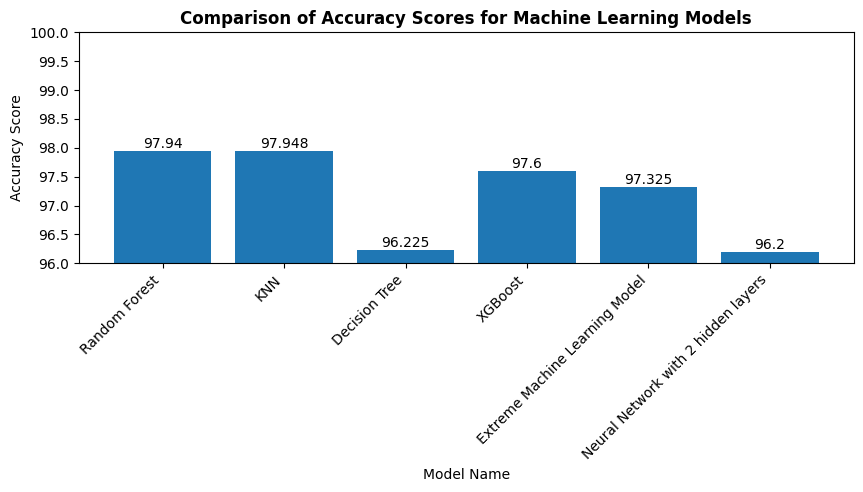

In [51]:
# Comparison of machine learning models with selected features from Step 2
# The
mlmodel_names = ["Random Forest","KNN","Decision Tree","XGBoost","Extreme Machine Learning Model","Neural Network with 2 hidden layers"]
mlmodel_acc = [97.940, 97.948, 96.225, round(XGB_Test_PM[0]*100,3), round(accuracy_EML_best,3), round((NN_Test_PM[0]*100),3)]

# Plot the bar graph using matplotlib
fig = plt.figure(figsize=(10, 3))
bars = plt.bar(mlmodel_names, mlmodel_acc)
plt.title('Comparison of Accuracy Scores for Machine Learning Models', fontsize=12, fontweight='bold')
plt.xlabel('Model Name')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.ylim([96, 100])
#plt.tight_layout()
# Adding value labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')
plt.show()




Observations: Random Forest, KNN, and XGBoost are found to be giving high accuracy. So these three models are considered for ensembling

## Ensemble model with Random Forest, KNN and XGBoost

In [52]:
# Define top three machine learning in accuracy for ensembling
M1 = RandomForestClassifier(n_estimators= 100, min_samples_split= 10, min_samples_leaf = 1, max_depth= 30)
M2 = KNeighborsClassifier(weights ='distance', p = 1, n_neighbors = 7)
M3 = XGBClassifier(n_estimators=1000 ,random_state=42)

# Assign weights to three machine learning models
eclf = VotingClassifier(estimators=[('rf', M1 ), ('knn', M2), ('xgb', M3)], voting='hard', weights=[4,4,2])

# Fir the model
eclf.fit(X_train_selected, y_train)

#Model fit with trainig data
y_train_ensemble_predict = eclf.predict(X_train_selected)

#Model predictions on the test data
y_pred_ensemble = eclf.predict(X_test_selected)

In [53]:
# Evaluate performance metric for training and testing data
Train_PM = Perf_Metric(y_train,y_train_ensemble_predict)
Test_PM = Perf_Metric(y_test,y_pred_ensemble)

Ensemble_Train_PM = Train_PM
Ensemble_Test_PM = Test_PM

In [54]:
# Create a table comparing the preformance on training and test data
models = pd.DataFrame({
    #'Model': ['RF'],
    'Dataset': ["Train","Test"],
    'Accuracy Score': [Train_PM[0], Test_PM[0]],
    'F1 Score': [Train_PM[1], Test_PM[1]],
    'Precision': [Train_PM[2], Test_PM[2]],
    'Recall': [Train_PM[3], Test_PM[3]],
})
models

,Dataset,Accuracy Score,F1 Score,Precision,Recall
0,Train,0.999,0.999,0.999,0.999
1,Test,0.981,0.983,0.981,0.984


No Skill: ROC AUC=0.500
Ensemble: ROC AUC=0.979


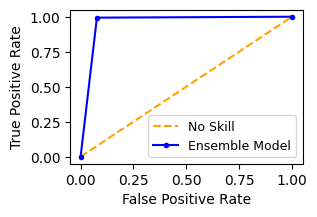

In [55]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Ensemble: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# plot the roc curve for the model
fig = plt.figure(figsize=(3, 2))
plt.plot(ns_fpr, ns_tpr, linestyle='--', color='orange', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', color='blue', label='Ensemble Model')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend(fontsize = 9)

# show the plot
plt.show()